In [1]:
import pandas as pd
import requests
import pprint
from pymongo import MongoClient
from bs4 import BeautifulSoup
import json
import time
from lxml import html
from io import StringIO
from datetime import datetime

### The first few years of data in this scrape worksheet have lots of annotations and printing out the list a lot to check what each step of the cleaning has given me. After I get it streamlined I'm just running the same lines of code for each next year of data that i'm scraping, no list printouts or annotations, its all the same for each year.

In [2]:
pd.set_option('display.max_columns', None)

# 2017 Scrape: Jose Altuve

In [3]:
xpath = "//pre[5]/text()"
url = "https://www.retrosheet.org/boxesetc/2017/Ialtuj0010072017.htm"
r = requests.get(url)
page = html.parse(StringIO(r.text))
altuve_2017 = page.xpath(xpath)

In [4]:
altuve_2017

['   Date    #         Opponent  GS  AB   R   H  2B  3B  HR RBI  BB IBB  SO HBP  SH  SF  XI ROE GDP  SB  CS   AVG   OBP   SLG  BP  Pos\n',
 '   ',
 ' VS SEA A   1   4   0   1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0  .250  .250  .250   3  2b\n',
 '   ',
 ' VS SEA A   1   3   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  .286  .286  .286   3  2b\n',
 '   ',
 ' VS SEA A   1   6   0   0   0   0   0   0   0   0   2   0   0   0   0   1   0   0   0  .154  .154  .154   3  2b\n',
 '   ',
 ' VS SEA A   1   4   0   1   0   0   0   0   0   0   2   0   0   0   0   0   1   0   0  .176  .176  .176   3  2b\n',
 '   ',
 ' VS KC  A   1   4   0   0   0   0   0   0   0   0   2   0   0   0   0   0   2   0   0  .143  .143  .143   3  2b\n',
 '   ',
 ' VS KC  A   1   4   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  .160  .160  .160   3  2b\n',
 '   ',
 ' VS KC  A   1   5   0   2   0   0   0   0   1   1   0   0   0   0   0   0   0   1   0  .200  .2

In [5]:
len(altuve_2017)

307

In [6]:
altuve_2017[0]

'   Date    #         Opponent  GS  AB   R   H  2B  3B  HR RBI  BB IBB  SO HBP  SH  SF  XI ROE GDP  SB  CS   AVG   OBP   SLG  BP  Pos\n'

In [7]:
altuve_2017[0][108:111]

'AVG'

the header row has the 'AVG' header in index [108:111]

the index of the 'AVG' column in the header row turned out to not be useful after all

verify row index 0 is header, row index 1 is empty, and row index 2 is first line of data

In [8]:
altuve_2017[0:3]

['   Date    #         Opponent  GS  AB   R   H  2B  3B  HR RBI  BB IBB  SO HBP  SH  SF  XI ROE GDP  SB  CS   AVG   OBP   SLG  BP  Pos\n',
 '   ',
 ' VS SEA A   1   4   0   1   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0  .250  .250  .250   3  2b\n']

verify index of batting average on a few lines of the list

In [9]:
altuve_2017[2][93:97]

'.250'

In [10]:
altuve_2017[4][93:97]

'.286'

the rows for each game have the batting average data in index [93:97]

the data in 'altuve_2017' is lines of text if index is even, and empty spaces if index is odd, so next block of code will get rid of the empty lines

In [11]:
altuve_2017_game_data_only = []
for idx, row in enumerate(altuve_2017):
    if idx % 2 == 0:
        altuve_2017_game_data_only.append(row)

next remove the header row

In [12]:
altuve_2017_game_data_only = altuve_2017_game_data_only[1:]

In [13]:
len(altuve_2017_game_data_only)

153

remove the mid-table column header repeats.

this next line was finding out what part of the line had the extra column header information that repeats throughout the table on the website, and that was incorporated into building the altuve_2017_game_data_cleaned list

In [14]:
altuve_2017_game_data_only[19][112:119]

'   Date'

In [15]:
altuve_2017_game_data_cleaned = []
for row in altuve_2017_game_data_only:
    if row[112:119] == '   Date':
        altuve_2017_game_data_cleaned.append(row[0:112]) #cuts out the parts of the rows that have repeat column headers 
    else:
        altuve_2017_game_data_cleaned.append(row)

In [16]:
len(altuve_2017_game_data_cleaned)

153

identify the index of the batting average in each line

In [17]:
altuve_2017_game_data_only[0][87:91]

'.250'

slice out just the batting average data, and cast as float

In [18]:
altuve_2017_averages = [float(row[87:91]) for row in altuve_2017_game_data_cleaned]
altuve_2017_averages

[0.25,
 0.286,
 0.154,
 0.176,
 0.143,
 0.16,
 0.2,
 0.188,
 0.216,
 0.275,
 0.326,
 0.319,
 0.32,
 0.333,
 0.328,
 0.311,
 0.303,
 0.304,
 0.324,
 0.312,
 0.321,
 0.305,
 0.318,
 0.326,
 0.326,
 0.326,
 0.31,
 0.302,
 0.297,
 0.297,
 0.304,
 0.303,
 0.295,
 0.294,
 0.298,
 0.289,
 0.286,
 0.292,
 0.295,
 0.311,
 0.31,
 0.308,
 0.307,
 0.305,
 0.298,
 0.297,
 0.298,
 0.291,
 0.301,
 0.3,
 0.308,
 0.32,
 0.319,
 0.322,
 0.329,
 0.323,
 0.326,
 0.326,
 0.326,
 0.325,
 0.319,
 0.324,
 0.322,
 0.317,
 0.312,
 0.32,
 0.324,
 0.327,
 0.331,
 0.326,
 0.325,
 0.322,
 0.323,
 0.32,
 0.319,
 0.324,
 0.328,
 0.327,
 0.33,
 0.327,
 0.326,
 0.33,
 0.334,
 0.338,
 0.342,
 0.347,
 0.349,
 0.348,
 0.35,
 0.347,
 0.351,
 0.353,
 0.352,
 0.352,
 0.358,
 0.365,
 0.364,
 0.365,
 0.369,
 0.365,
 0.367,
 0.368,
 0.365,
 0.361,
 0.365,
 0.361,
 0.364,
 0.365,
 0.364,
 0.365,
 0.363,
 0.361,
 0.362,
 0.361,
 0.363,
 0.364,
 0.361,
 0.362,
 0.364,
 0.362,
 0.358,
 0.358,
 0.357,
 0.355,
 0.356,
 0.355,
 0.354,

In [19]:
len(altuve_2017_averages)

153

## 2017 Dates

In [20]:
url = "https://www.retrosheet.org/boxesetc/2017/Ialtuj0010072017.htm"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)
    
link_text_dates = link_text[48:]

altuve_2017_dates = []
for i in link_text_dates:
    if '2017' in i:
        altuve_2017_dates.append(i)

In [21]:
altuve_2017_dates

[' 4- 3-2017',
 ' 4- 4-2017',
 ' 4- 5-2017',
 ' 4- 6-2017',
 ' 4- 7-2017',
 ' 4- 8-2017',
 ' 4- 9-2017',
 ' 4-10-2017',
 ' 4-11-2017',
 ' 4-12-2017',
 ' 4-14-2017',
 ' 4-15-2017',
 ' 4-17-2017',
 ' 4-18-2017',
 ' 4-19-2017',
 ' 4-20-2017',
 ' 4-21-2017',
 ' 4-22-2017',
 ' 4-23-2017',
 ' 4-25-2017',
 ' 4-27-2017',
 ' 4-28-2017',
 ' 4-29-2017',
 ' 4-30-2017',
 ' 5- 1-2017',
 ' 5- 2-2017',
 ' 5- 3-2017',
 ' 5- 4-2017',
 ' 5- 5-2017',
 ' 5- 6-2017',
 ' 5- 7-2017',
 ' 5- 9-2017',
 ' 5-10-2017',
 ' 5-11-2017',
 ' 5-12-2017',
 ' 5-14-2017',
 ' 5-14-2017',
 ' 5-15-2017',
 ' 5-16-2017',
 ' 5-17-2017',
 ' 5-19-2017',
 ' 5-20-2017',
 ' 5-21-2017',
 ' 5-22-2017',
 ' 5-23-2017',
 ' 5-24-2017',
 ' 5-25-2017',
 ' 5-26-2017',
 ' 5-27-2017',
 ' 5-28-2017',
 ' 5-29-2017',
 ' 5-30-2017',
 ' 5-31-2017',
 ' 6- 2-2017',
 ' 6- 3-2017',
 ' 6- 4-2017',
 ' 6- 5-2017',
 ' 6- 6-2017',
 ' 6- 7-2017',
 ' 6- 8-2017',
 ' 6- 9-2017',
 ' 6-10-2017',
 ' 6-11-2017',
 ' 6-12-2017',
 ' 6-13-2017',
 ' 6-14-2017',
 ' 6-16-20

In [22]:
len(altuve_2017_dates)

153

and now to slice out the empty spaces out of each date item, and convert to a datetime object

In [23]:
altuve_2017_dates_cleaned = []
for date in altuve_2017_dates:
    altuve_2017_dates_cleaned.append(date.replace(' ', '0'))

In [24]:
altuve_2017_dates_final = []
for date in altuve_2017_dates_cleaned:
    altuve_2017_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))

In [25]:
altuve_2017_dates_final

['04-03',
 '04-04',
 '04-05',
 '04-06',
 '04-07',
 '04-08',
 '04-09',
 '04-10',
 '04-11',
 '04-12',
 '04-14',
 '04-15',
 '04-17',
 '04-18',
 '04-19',
 '04-20',
 '04-21',
 '04-22',
 '04-23',
 '04-25',
 '04-27',
 '04-28',
 '04-29',
 '04-30',
 '05-01',
 '05-02',
 '05-03',
 '05-04',
 '05-05',
 '05-06',
 '05-07',
 '05-09',
 '05-10',
 '05-11',
 '05-12',
 '05-14',
 '05-14',
 '05-15',
 '05-16',
 '05-17',
 '05-19',
 '05-20',
 '05-21',
 '05-22',
 '05-23',
 '05-24',
 '05-25',
 '05-26',
 '05-27',
 '05-28',
 '05-29',
 '05-30',
 '05-31',
 '06-02',
 '06-03',
 '06-04',
 '06-05',
 '06-06',
 '06-07',
 '06-08',
 '06-09',
 '06-10',
 '06-11',
 '06-12',
 '06-13',
 '06-14',
 '06-16',
 '06-17',
 '06-18',
 '06-19',
 '06-20',
 '06-21',
 '06-23',
 '06-24',
 '06-25',
 '06-27',
 '06-28',
 '06-29',
 '06-30',
 '07-01',
 '07-02',
 '07-04',
 '07-05',
 '07-06',
 '07-07',
 '07-09',
 '07-14',
 '07-15',
 '07-16',
 '07-17',
 '07-18',
 '07-19',
 '07-21',
 '07-22',
 '07-23',
 '07-24',
 '07-25',
 '07-26',
 '07-28',
 '07-29',


## lists i am interested in after cleaning the data are:
altuve_2017_dates_final

and

altuve_2017_averages

now to combine the dates and the batting averages into a pandas dataframe

In [26]:
altuve_2017_df = pd.DataFrame(altuve_2017_averages, altuve_2017_dates_final).reset_index()
altuve_2017_df.columns = ['2017', 'Batting Average']
altuve_2017_df

,2017,Batting Average
0,04-03,0.250
1,04-04,0.286
2,04-05,0.154
3,04-06,0.176
4,04-07,0.143
...,...,...
148,09-27,0.347
149,09-28,0.350
150,09-29,0.348
151,09-30,0.347


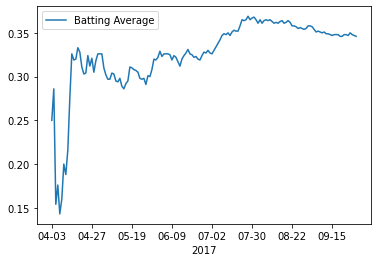

In [27]:
altuve_2017_df.plot('2017', 'Batting Average')

# 2016 Scrape: Jose Altuve

In [28]:
xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2016/Ialtuj0010062016.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
altuve_2016 = page.xpath(xpath)

verify index 0, 1, and 2 are header, empty, and first line of text data

In [29]:
altuve_2016[0]

'   Date    #         Opponent  GS  AB   R   H  2B  3B  HR RBI  BB IBB  SO HBP  SH  SF  XI ROE GDP  SB  CS   AVG   OBP   SLG  BP  Pos\n'

In [30]:
altuve_2016[1]

'   '

In [31]:
altuve_2016[2]

' AT NY  A   1   4   2   1   1   0   0   0   1   0   0   0   0   0   0   0   0   1   0  .250  .400  .500   1  2b\n'

get rid of empty lines, and remove header row

In [32]:
altuve_2016_game_data_only = []
for idx, row in enumerate(altuve_2016):
    if idx % 2 == 0:
        altuve_2016_game_data_only.append(row)

In [33]:
altuve_2016_game_data_only = altuve_2016_game_data_only[1:]

In [34]:
len(altuve_2016_game_data_only)

161

remove the mid-table column header repeats.

this next line was finding out what part of the line had the extra column header information that repeats throughout the table on the website, and that was incorporated into building the altuve_2017_game_data_cleaned list

In [35]:
altuve_2016_game_data_only[19][112:119]

'   Date'

In [36]:
altuve_2016_game_data_cleaned = []
for row in altuve_2016_game_data_only:
    if row[112:119] == '   Date':
        altuve_2016_game_data_cleaned.append(row[0:112])
    else:
        altuve_2016_game_data_cleaned.append(row)

verify the index of the batting average data in each line

In [37]:
altuve_2016_game_data_only[1][87:91]

'.286'

construct list of float batting averages

In [38]:
altuve_2016_averages = [float(row[87:91]) for row in altuve_2016_game_data_cleaned]

In [39]:
len(altuve_2016_averages)

161

## 2016 dates

In [40]:
url = 'https://www.retrosheet.org/boxesetc/2016/Ialtuj0010062016.htm'
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

link_text_dates = link_text[48:]

altuve_2016_dates = []
for i in link_text_dates:
    if '2016' in i:
        altuve_2016_dates.append(i)

instead of doing several for loops with indexing/slicing, this replace method is much more efficient at getting the date text into the format i need

In [41]:
altuve_2016_dates_cleaned = []
for date in altuve_2016_dates:
    altuve_2016_dates_cleaned.append(date.replace(' ', '0'))

identify date components in string and convert to datetime object

In [42]:
altuve_2016_dates_final = []
for date in altuve_2016_dates_cleaned:
    altuve_2016_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))

build 2016 dataframe

In [43]:
altuve_2016_df = pd.DataFrame(altuve_2016_averages, altuve_2016_dates_final).reset_index()
altuve_2016_df.columns = ['2016', 'Batting Average']
altuve_2016_df

,2016,Batting Average
0,04-05,0.250
1,04-06,0.286
2,04-07,0.182
3,04-08,0.188
4,04-09,0.190
...,...,...
156,09-27,0.339
157,09-28,0.337
158,09-30,0.337
159,10-01,0.338


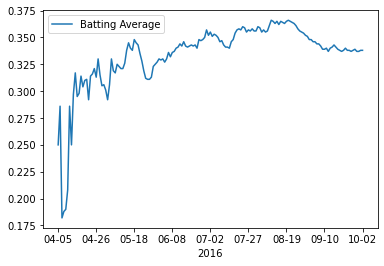

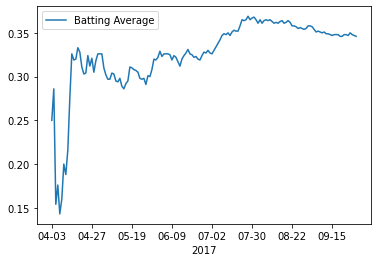

In [44]:
altuve_2016_df.plot('2016', 'Batting Average')
altuve_2017_df.plot('2017', 'Batting Average')

# 2015 Scrape: Jose Altuve

In [45]:
xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2015/Ialtuj0010052015.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
altuve_2015 = page.xpath(xpath)

In [46]:
altuve_2015[0:3]

['   Date    #         Opponent  GS  AB   R   H  2B  3B  HR RBI  BB IBB  SO HBP  SH  SF  XI ROE GDP  SB  CS   AVG   OBP   SLG  BP  Pos\n',
 '   ',
 ' VS CLE A   1   4   1   1   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0  .250  .250  .250   1  2b\n']

In [47]:
altuve_2015_game_data_only = []
for idx, row in enumerate(altuve_2015):
    if idx % 2 == 0:
        altuve_2015_game_data_only.append(row)

altuve_2015_game_data_only = altuve_2015_game_data_only[1:]

In [48]:
len(altuve_2015_game_data_only)

154

remove the mid-table column header repeats.

this next line was finding out what part of the line had the extra column header information that repeats throughout the table on the website, and that was incorporated into building the altuve_2015_game_data_cleaned list

In [49]:
altuve_2015_game_data_only[19][112:119]

'   Date'

In [50]:
altuve_2015_game_data_cleaned = []
for row in altuve_2015_game_data_only:
    if row[112:119] == '   Date':
        altuve_2015_game_data_cleaned.append(row[0:112])
    else:
        altuve_2015_game_data_cleaned.append(row)

verify the index of the batting average data in each line

In [51]:
altuve_2015_game_data_only[2][87:91]

'.091'

construct list of float batting averages

In [52]:
altuve_2015_averages = [float(row[87:91]) for row in altuve_2015_game_data_cleaned]

## 2015 Dates

In [53]:
url = 'https://www.retrosheet.org/boxesetc/2015/Ialtuj0010052015.htm'
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

link_text_dates = link_text[48:]

altuve_2015_dates = []
for i in link_text_dates:
    if '2015' in i:
        altuve_2015_dates.append(i)

In [54]:
altuve_2015_dates_cleaned = []
for date in altuve_2015_dates:
    altuve_2015_dates_cleaned.append(date.replace(' ', '0'))

In [55]:
altuve_2015_dates_final = []
for date in altuve_2015_dates_cleaned:
    altuve_2015_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))

In [56]:
altuve_2015_df = pd.DataFrame(altuve_2015_averages, altuve_2015_dates_final).reset_index()
altuve_2015_df.columns = ['2015', 'Batting Average']
altuve_2015_df

,2015,Batting Average
0,04-06,0.250
1,04-08,0.125
2,04-09,0.091
3,04-10,0.125
4,04-11,0.200
...,...,...
149,09-29,0.311
150,09-30,0.310
151,10-02,0.310
152,10-03,0.311


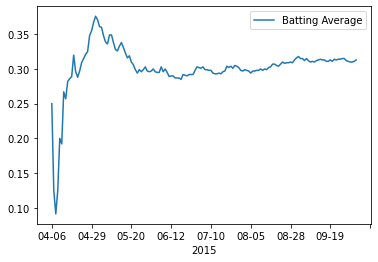

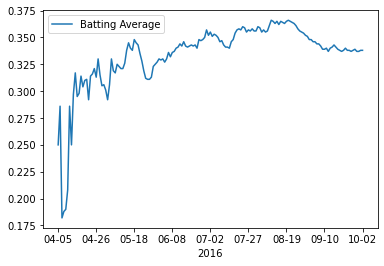

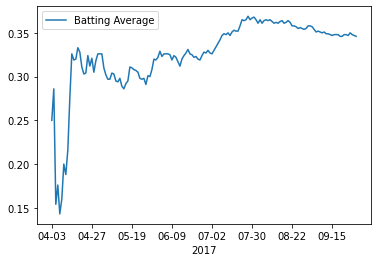

In [57]:
altuve_2015_df.plot('2015', 'Batting Average')
altuve_2016_df.plot('2016', 'Batting Average')
altuve_2017_df.plot('2017', 'Batting Average')

# 2014 Scrape: Jose Altuve

In [58]:
xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2014/Ialtuj0010042014.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
altuve_2014 = page.xpath(xpath)

In [59]:
altuve_2014[0:3]

['   Date    #         Opponent  GS  AB   R   H  2B  3B  HR RBI  BB IBB  SO HBP  SH  SF  XI ROE GDP  SB  CS   AVG   OBP   SLG  BP  Pos\n',
 '   ',
 ' VS NY  A   1   4   1   2   0   0   0   2   0   0   0   0   0   0   0   0   0   1   0  .500  .500  .500   3  2b\n']

In [60]:
altuve_2014_game_data_only = []
for idx, row in enumerate(altuve_2014):
    if idx % 2 == 0:
        altuve_2014_game_data_only.append(row)

altuve_2014_game_data_only = altuve_2014_game_data_only[1:]

In [62]:
len(altuve_2014_game_data_only)

158

In [63]:
altuve_2014_game_data_only[19][112:119]

'   Date'

In [64]:
altuve_2014_game_data_cleaned = []
for row in altuve_2014_game_data_only:
    if row[112:119] == '   Date':
        altuve_2014_game_data_cleaned.append(row[0:112])
    else:
        altuve_2014_game_data_cleaned.append(row)

In [65]:
altuve_2014_game_data_only[3][87:91]

'.385'

In [66]:
altuve_2014_averages = [float(row[87:91]) for row in altuve_2014_game_data_cleaned]

## 2014 Dates

In [67]:
url = 'https://www.retrosheet.org/boxesetc/2014/Ialtuj0010042014.htm'
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

link_text_dates = link_text[48:]

altuve_2014_dates = []
for i in link_text_dates:
    if '2014' in i:
        altuve_2014_dates.append(i)

In [68]:
altuve_2014_dates_cleaned = []
for date in altuve_2014_dates:
    altuve_2014_dates_cleaned.append(date.replace(' ', '0'))

In [69]:
altuve_2014_dates_final = []
for date in altuve_2014_dates_cleaned:
    altuve_2014_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))

In [70]:
altuve_2014_df = pd.DataFrame(altuve_2014_averages, altuve_2014_dates_final).reset_index()
altuve_2014_df.columns = ['2014', 'Batting Average']
altuve_2014_df

,2014,Batting Average
0,04-01,0.500
1,04-02,0.286
2,04-03,0.300
3,04-04,0.385
4,04-05,0.375
...,...,...
153,09-23,0.343
154,09-24,0.343
155,09-26,0.342
156,09-27,0.340


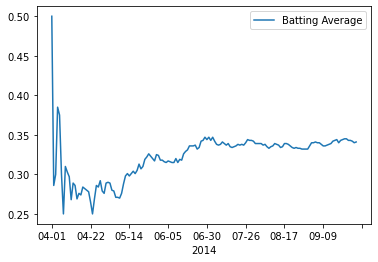

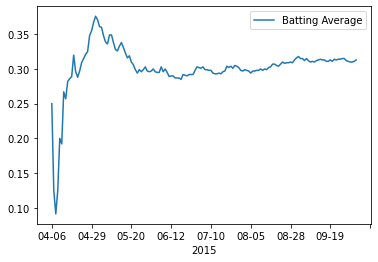

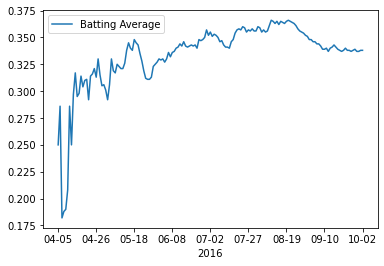

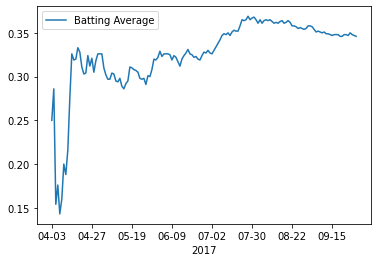

In [71]:
altuve_2014_df.plot('2014', 'Batting Average')
altuve_2015_df.plot('2015', 'Batting Average')
altuve_2016_df.plot('2016', 'Batting Average')
altuve_2017_df.plot('2017', 'Batting Average')

# 2013 Scrape: Jose Altuve

In [72]:
xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2013/Ialtuj0010032013.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
altuve_2013 = page.xpath(xpath)

In [73]:
altuve_2013_game_data_only = []
for idx, row in enumerate(altuve_2013):
    if idx % 2 == 0:
        altuve_2013_game_data_only.append(row)

altuve_2013_game_data_only = altuve_2013_game_data_only[1:]

In [74]:
altuve_2013_game_data_cleaned = []
for row in altuve_2013_game_data_only:
    if row[112:119] == '   Date':
        altuve_2013_game_data_cleaned.append(row[0:112])
    else:
        altuve_2013_game_data_cleaned.append(row)

In [75]:
altuve_2013_averages = [float(row[87:91]) for row in altuve_2013_game_data_cleaned]

## 2013 Dates

In [76]:
url = 'https://www.retrosheet.org/boxesetc/2013/Ialtuj0010032013.htm'
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

link_text_dates = link_text[48:]

altuve_2013_dates = []
for i in link_text_dates:
    if '2013' in i:
        altuve_2013_dates.append(i)

In [77]:
altuve_2013_dates_cleaned = []
for date in altuve_2013_dates:
    altuve_2013_dates_cleaned.append(date.replace(' ', '0'))

In [78]:
altuve_2013_dates_final = []
for date in altuve_2013_dates_cleaned:
    altuve_2013_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))

In [79]:
altuve_2013_df = pd.DataFrame(altuve_2013_averages, altuve_2013_dates_final).reset_index()
altuve_2013_df.columns = ['2013', 'Batting Average']
altuve_2013_df

,2013,Batting Average
0,03-31,0.500
1,04-02,0.375
2,04-03,0.417
3,04-05,0.438
4,04-06,0.400
...,...,...
147,09-24,0.284
148,09-25,0.285
149,09-27,0.284
150,09-28,0.285


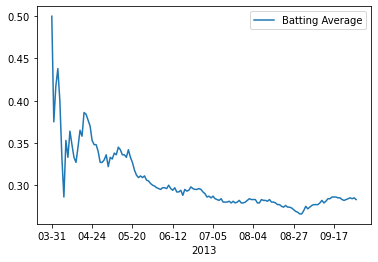

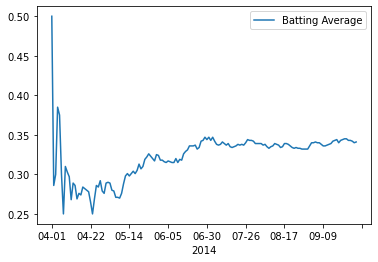

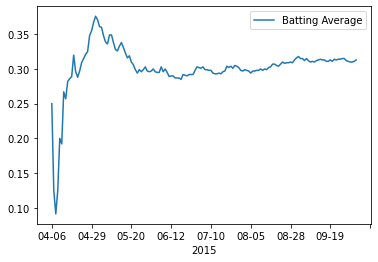

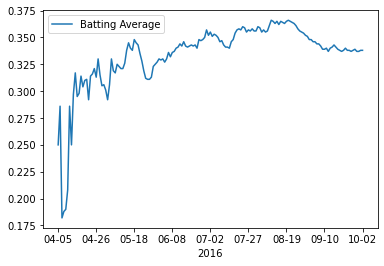

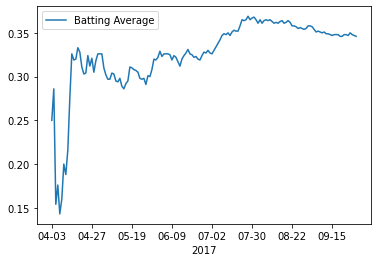

In [80]:
altuve_2013_df.plot('2013', 'Batting Average')
altuve_2014_df.plot('2014', 'Batting Average')
altuve_2015_df.plot('2015', 'Batting Average')
altuve_2016_df.plot('2016', 'Batting Average')
altuve_2017_df.plot('2017', 'Batting Average')

# 2012 Scrape: Jose Altuve

In [81]:
xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2012/Ialtuj0010022012.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
altuve_2012 = page.xpath(xpath)

altuve_2012_game_data_only = []
for idx, row in enumerate(altuve_2012):
    if idx % 2 == 0:
        altuve_2012_game_data_only.append(row)

altuve_2012_game_data_only = altuve_2012_game_data_only[1:]

altuve_2012_game_data_cleaned = []
for row in altuve_2012_game_data_only:
    if row[112:119] == '   Date':
        altuve_2012_game_data_cleaned.append(row[0:112])
    else:
        altuve_2012_game_data_cleaned.append(row)
        
altuve_2012_averages = [float(row[87:91]) for row in altuve_2012_game_data_cleaned]

## 2012 Dates

In [82]:
url = 'https://www.retrosheet.org/boxesetc/2012/Ialtuj0010022012.htm'
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

link_text_dates = link_text[48:]

altuve_2012_dates = []
for i in link_text_dates:
    if '2012' in i:
        altuve_2012_dates.append(i)
        
altuve_2012_dates_cleaned = []
for date in altuve_2012_dates:
    altuve_2012_dates_cleaned.append(date.replace(' ', '0'))
    
altuve_2012_dates_final = []
for date in altuve_2012_dates_cleaned:
    altuve_2012_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))
    
altuve_2012_df = pd.DataFrame(altuve_2012_averages, altuve_2012_dates_final).reset_index()
altuve_2012_df.columns = ['2012', 'Batting Average']
altuve_2012_df

,2012,Batting Average
0,04-06,0.000
1,04-08,0.333
2,04-09,0.333
3,04-10,0.357
4,04-11,0.368
...,...,...
142,09-26,0.292
143,09-28,0.293
144,09-29,0.291
145,10-01,0.291


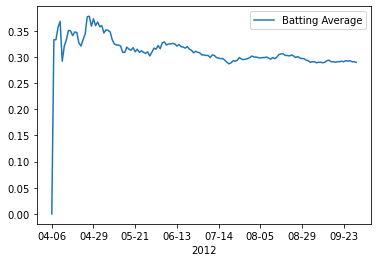

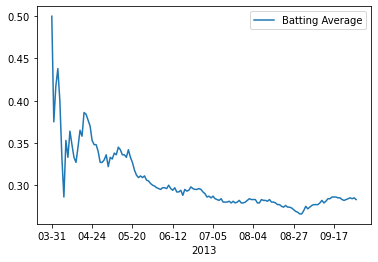

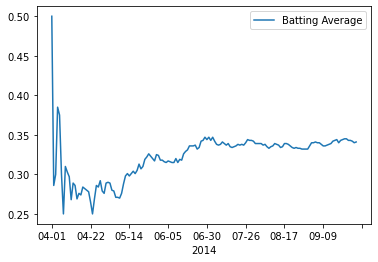

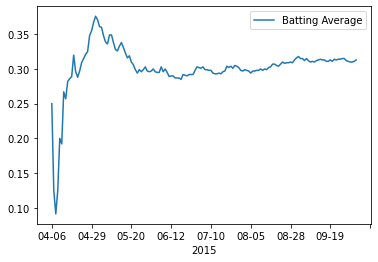

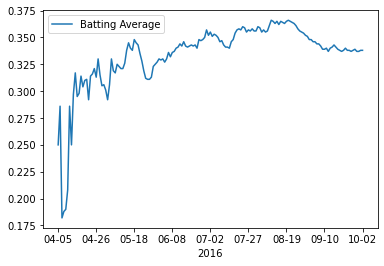

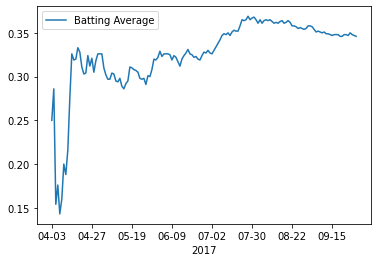

In [83]:
altuve_2012_df.plot('2012', 'Batting Average')
altuve_2013_df.plot('2013', 'Batting Average')
altuve_2014_df.plot('2014', 'Batting Average')
altuve_2015_df.plot('2015', 'Batting Average')
altuve_2016_df.plot('2016', 'Batting Average')
altuve_2017_df.plot('2017', 'Batting Average')

# 2011 Scrape: Jose Altuve

In [84]:
# batting averages

xpath = "//pre[5]/text()"
url = 'https://www.retrosheet.org/boxesetc/2011/Ialtuj0010012011.htm'
r = requests.get(url)
page = html.parse(StringIO(r.text))
altuve_2011 = page.xpath(xpath)

altuve_2011_game_data_only = []
for idx, row in enumerate(altuve_2011):
    if idx % 2 == 0:
        altuve_2011_game_data_only.append(row)
        

altuve_2011_game_data_cleaned = []
for row in altuve_2011_game_data_only[1:]:
    if row[112:119] == '   Date':
        altuve_2011_game_data_cleaned.append(row[0:112])
    else:
        altuve_2011_game_data_cleaned.append(row)
        
altuve_2011_averages = [float(row[87:91]) for row in altuve_2011_game_data_cleaned]

In [85]:
# and now for the dates

soup = BeautifulSoup(r.text, 'html.parser')

link_text = []
for a in soup.find_all('a'):
    link_text.append(a.string)

altuve_2011_dates = []
for i in link_text:
    if '2011' in i:
        altuve_2011_dates.append(i)

altuve_2011_dates_cleaned = []
for date in altuve_2011_dates:
    altuve_2011_dates_cleaned.append(date.replace(' ', '0'))
    
altuve_2011_dates_final = []
for date in altuve_2011_dates_cleaned:
    altuve_2011_dates_final.append(datetime.strftime(datetime.strptime(date, '%m-%d-%Y'), '%m-%d'))
    
altuve_2011_df = pd.DataFrame(altuve_2011_averages, altuve_2011_dates_final).reset_index()
altuve_2011_df.columns = ['2011', 'Batting Average']
altuve_2011_df

,2011,Batting Average
0,07-20,0.200
1,07-22,0.250
2,07-23,0.250
3,07-24,0.308
4,07-25,0.412
5,07-26,0.381
6,07-27,0.423
7,07-28,0.367
8,07-29,0.353
9,07-30,0.371


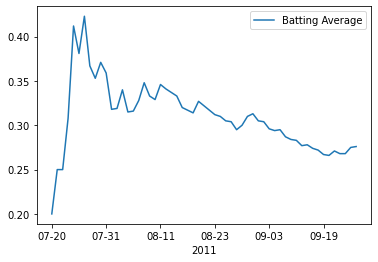

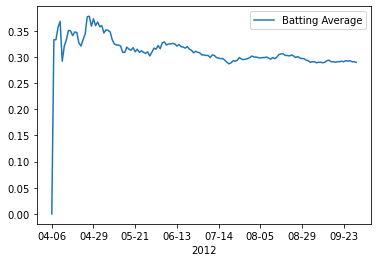

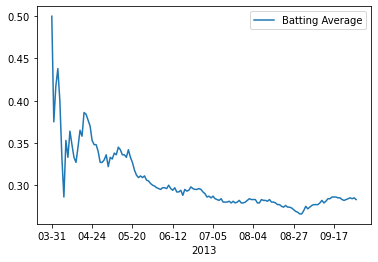

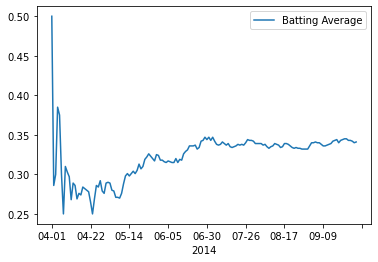

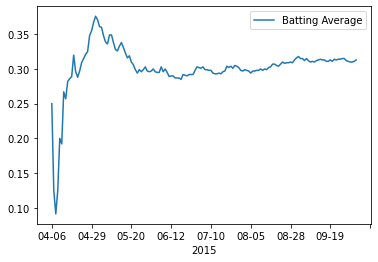

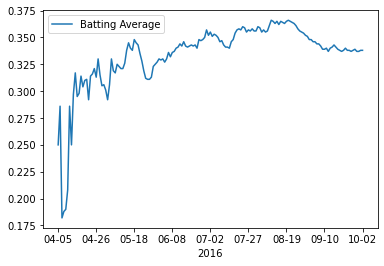

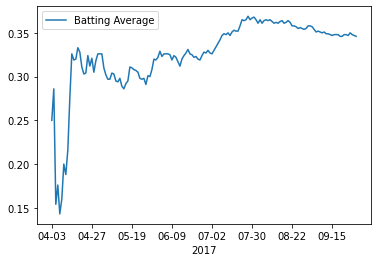

In [86]:
altuve_2011_df.plot('2011', 'Batting Average')
altuve_2012_df.plot('2012', 'Batting Average')
altuve_2013_df.plot('2013', 'Batting Average')
altuve_2014_df.plot('2014', 'Batting Average')
altuve_2015_df.plot('2015', 'Batting Average')
altuve_2016_df.plot('2016', 'Batting Average')
altuve_2017_df.plot('2017', 'Batting Average')

In [89]:
altuve_2011_df.to_csv('csv_from_scrape/altuve_2011_df.csv')
altuve_2012_df.to_csv('csv_from_scrape/altuve_2012_df.csv')
altuve_2013_df.to_csv('csv_from_scrape/altuve_2013_df.csv')
altuve_2014_df.to_csv('csv_from_scrape/altuve_2014_df.csv')
altuve_2015_df.to_csv('csv_from_scrape/altuve_2015_df.csv')
altuve_2016_df.to_csv('csv_from_scrape/altuve_2016_df.csv')
altuve_2017_df.to_csv('csv_from_scrape/altuve_2017_df.csv')